In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
import math
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score as val_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split as sk_split
import statsmodels.api as sm

%matplotlib inline

In [2]:
#read in crops
allcrops_2000 = pd.read_csv('datasets/allcrops_2000.csv')
# names of all the crops
crop_names = allcrops_2000['ItemName'].unique()

# remove nan
crop_names = crop_names[:-1]
# list to put our separated crop dataframes
all_crop_dfs = []

# find each crop-separated df and put it in the list of dataframes
for crop in crop_names:
    crop_df = allcrops_2000[(allcrops_2000['ItemName'] == crop)]
    all_crop_dfs.append(crop_df)

print crop_names

['Wheat and products' 'Barley and products' 'Maize and products'
 'Rye and products' 'Oats' 'Cereals, Other' 'Potatoes and products'
 'Sugar (Raw Equivalent)' 'Sweeteners, Other' 'Pulses, Other and products'
 'Nuts and products' 'Soyabeans' 'Groundnuts (Shelled Eq)'
 'Coconuts - Incl Copra' 'Sesame seed' 'Olives (including preserved)'
 'Oilcrops, Other' 'Soyabean Oil' 'Groundnut Oil' 'Sunflowerseed Oil'
 'Rape and Mustard Oil' 'Cottonseed Oil' 'Palmkernel Oil' 'Coconut Oil'
 'Sesameseed Oil' 'Olive Oil' 'Maize Germ Oil' 'Oilcrops Oil, Other'
 'Tomatoes and products' 'Onions' 'Vegetables, Other' 'Oranges, Mandarines'
 'Lemons, Limes and products' 'Grapefruit and products' 'Citrus, Other'
 'Bananas' 'Apples and products' 'Pineapples and products' 'Dates'
 'Grapes and products (excl wine)' 'Fruits, Other' 'Coffee and products'
 'Cocoa Beans and products' 'Tea (including mate)' 'Pepper' 'Pimento'
 'Spices, Other' 'Wine' 'Beer' 'Beverages, Fermented'
 'Beverages, Alcoholic' 'Infant food' 'R

In [27]:
# Do the same as above, but for livestock
livestock_2000 = pd.read_csv('datasets/livestock_2000.csv')
# list of livestock names
livestock_names_all = livestock_2000['ItemName'].unique()
livestock_names_all = livestock_names_all[1:-1]
livestock_names = []
for name in livestock_names_all:
    if name != 'Grand Total':
        livestock_names.append(name)

# list to put our separated dataframes
livestock_dfs = []

# separate dataframe based on itemname
for crop in livestock_names:
    crop_df = livestock_2000[(livestock_2000['ItemName'] == crop)]
    livestock_dfs.append(crop_df)

print livestock_names
print len(livestock_names)


['Bovine Meat', 'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other', 'Offals, Edible', 'Fats, Animals, Raw', 'Milk, Whole', 'Butter, Ghee', 'Cheese', 'Cream', 'Eggs', 'Honey', 'Freshwater Fish', 'Demersal Fish', 'Pelagic Fish', 'Marine Fish, Other', 'Crustaceans', 'Cephalopods', 'Molluscs, Other', 'Aquatic Plants', 'Fish, Body Oil', 'Fish, Liver Oil', 'Milk - Excluding Butter', 'Meat', 'Offals', 'Animal fats', 'Fish, Seafood', 'Aquatic Products, Other', 'Animal Products', 'Aquatic Animals, Others', 'Whey', 'Meat Meal', 'Meat, Aquatic Mammals', 'Hides and skins']
35


In [28]:
# read in disease rates
column_headers = ["Country", "Year", "Mortality", "Mortality 2", "Mortality 3"]
diabetes = pd.read_csv('datasets/diabetes.csv', names = column_headers)
cardio = pd.read_csv('datasets/cardiovascular.csv', names = column_headers)
cancer= pd.read_csv('datasets/Cancer.csv', names = column_headers)

In [29]:
cardio.iloc[3:, 0:3].head(n=5)
#cardio.columns = ['Country', 'Year', 'Mortality']

,Country,Year,Mortality
3,Afghanistan,2012,511.5
4,Afghanistan,2000,542.3
5,Albania,2012,436.2
6,Albania,2000,560.5
7,Algeria,2012,396.6


In [30]:
cardio_2012 = cardio[(cardio["Year"] == "2012")] 
cardio_2000 = cardio[(cardio["Year"] == "2000")] 

In [31]:
diabetes_2012 = diabetes[(diabetes['Year'] == '2012')] 
diabetes_2000 = diabetes[(diabetes['Year'] == '2000')] 
diabetes_2000

,Country,Year,Mortality,Mortality 2,Mortality 3
4,Afghanistan,2000,34.0,35.1,32.8
6,Albania,2000,8.3,8.2,8.3
8,Algeria,2000,67.2,62.1,73.4
10,Angola,2000,35.0,36.4,33.2
12,Argentina,2000,19.9,16.0,25.2
14,Armenia,2000,32.2,33.6,29.2
16,Australia,2000,10.2,8.0,13.0
18,Austria,2000,15.5,12.4,19.3
20,Azerbaijan,2000,19.6,21.4,16.6
22,Bahamas,2000,45.6,41.5,49.9


In [32]:
cancer_2012 = cancer[(cancer['Year'] == ' 2012')] 
cancer_2000 = cancer[(cancer['Year'] == ' 2000')] 
cancer_2012

,Country,Year,Mortality,Mortality 2,Mortality 3
3,Afghanistan,2012,123.6,110.6,142.2
5,Albania,2012,123.1,105.3,142.5
7,Algeria,2012,80.6,78.0,83.9
9,Angola,2012,89.6,86.1,97.9
11,Argentina,2012,131.5,109.1,166.5
13,Armenia,2012,219.6,175.3,277.1
15,Australia,2012,111.0,90.6,135.9
17,Austria,2012,122.0,99.7,152.3
19,Azerbaijan,2012,112.8,88.5,145.0
21,Bahamas,2012,103.8,88.1,131.8


In [33]:
cardio_2012.head(n=5)

,Country,Year,Mortality,Mortality 2,Mortality 3
3,Afghanistan,2012,511.5,520.9,498.0
5,Albania,2012,436.2,417.6,447.4
7,Algeria,2012,396.6,359.9,434.6
9,Angola,2012,374.6,369.8,376.4
11,Argentina,2012,191.7,148.4,247.8


In [34]:
cardio_2000.head(n=5)

,Country,Year,Mortality,Mortality 2,Mortality 3
4,Afghanistan,2000,542.3,554.1,523.1
6,Albania,2000,560.5,494.7,638.6
8,Algeria,2000,434.7,401.2,472.2
10,Angola,2000,383.4,385.2,375.2
12,Argentina,2000,226.6,169.1,302.8


In [35]:
all_foods = all_crop_dfs
print len(all_foods)

89


In [43]:
# plot for cardio
def food_cardio_plot(food_df, cardio, ax):
    score = 1
    morts = []
    food_amts = []
    
    # for each country
    for country in food_df['AreaName'].values:
        # make sure it's in the disease df
        if not cardio[(cardio['Country'] == country)].empty:
            # find the disease data for that country
            country_data = cardio[(cardio['Country'] == country)]
            # find mortality rate
            mort = country_data.iloc[1,2]
            # append to mortality list
            morts.append(float(mort))
            # find amount of that particular food consumed in that country
            food_amt = food_df[(food_df['AreaName'] == country)].iloc[0, 9]
            # append to food_amounts
            food_amts.append(float(food_amt))
    
    # scatter the amounts against mortality rates
    ax.scatter(food_amts, morts)
    
    # reshape for LinReg to get R^2
    X = np.array(food_amts).reshape(-1, 1)
    y = np.array(morts)
    
    if (len(food_df['ItemName'].values) > 0) and (X.shape[0] > 0):
        # linreg
        regr = LinReg()
        # fit, score linreg
        regr.fit(X, y)
        score = regr.score(X,y)
        ax.set_title("R^2 = " + str(score))
    
    ax.set_xlabel(food_df['ItemName'].values[0])
    ax.set_ylabel('Cancer Disease Mortality Rate')
    
    return ax, score
    

In [44]:
# Diabetes plot works the same way except for diabetes
def food_diabetes_plot(food_df, cardio, ax):
    score = 1
    morts = []
    food_amts = []
    for country in food_df['AreaName'].values:
        if not cardio[(cardio['Country'] == country)].empty:
            country_data = cardio[(cardio['Country'] == country)]
            mort = country_data.iloc[1,2]
            morts.append(float(mort))
            food_amt = food_df[(food_df['AreaName'] == country)].iloc[0, 9]
            food_amts.append(float(food_amt))
    ax.scatter( food_amts, morts)
    X = np.array(food_amts).reshape(-1, 1)
    y = np.array(morts)
    if (len(food_df['ItemName'].values) > 0) and (X.shape[0] > 0):
        regr = LinReg()
        regr.fit(X, y)
        score = regr.score(X,y)
        ax.set_title("R^2 = " + str(score))
    
    ax.set_xlabel(food_df['ItemName'].values[0] + str('(kg/capita/yr)'))
    ax.set_ylabel('Diabetes Disease Mortality Rate')
    
    return ax, score

In [45]:
# Cancer works the same way except for cancer
def food_cancer_plot(food_df, cardio, ax):
    score = 1
    morts = []
    food_amts = []
    for country in food_df['AreaName'].values:
        if not cardio[(cardio['Country'] == country)].empty:
            country_data = cardio[(cardio['Country'] == country)]
            mort = country_data.iloc[1,2]
            morts.append(float(mort))
            food_amt = food_df[(food_df['AreaName'] == country)].iloc[0, 9]
            food_amts.append(float(food_amt))
    ax.scatter(food_amts, morts)
    
    X = np.array(food_amts).reshape(-1, 1)
    y = np.array(morts)
    
    if (len(food_df['ItemName'].values) > 0) and (X.shape[0] > 0):
        regr = LinReg()
        regr.fit(X, y)
        score = regr.score(X,y)
        ax.set_title("R^2 = " + str(score))
        ax.set_xlabel(food_df['ItemName'].values[0])
        ax.set_ylabel('Cancer Disease Mortality Rate')
    return ax, score

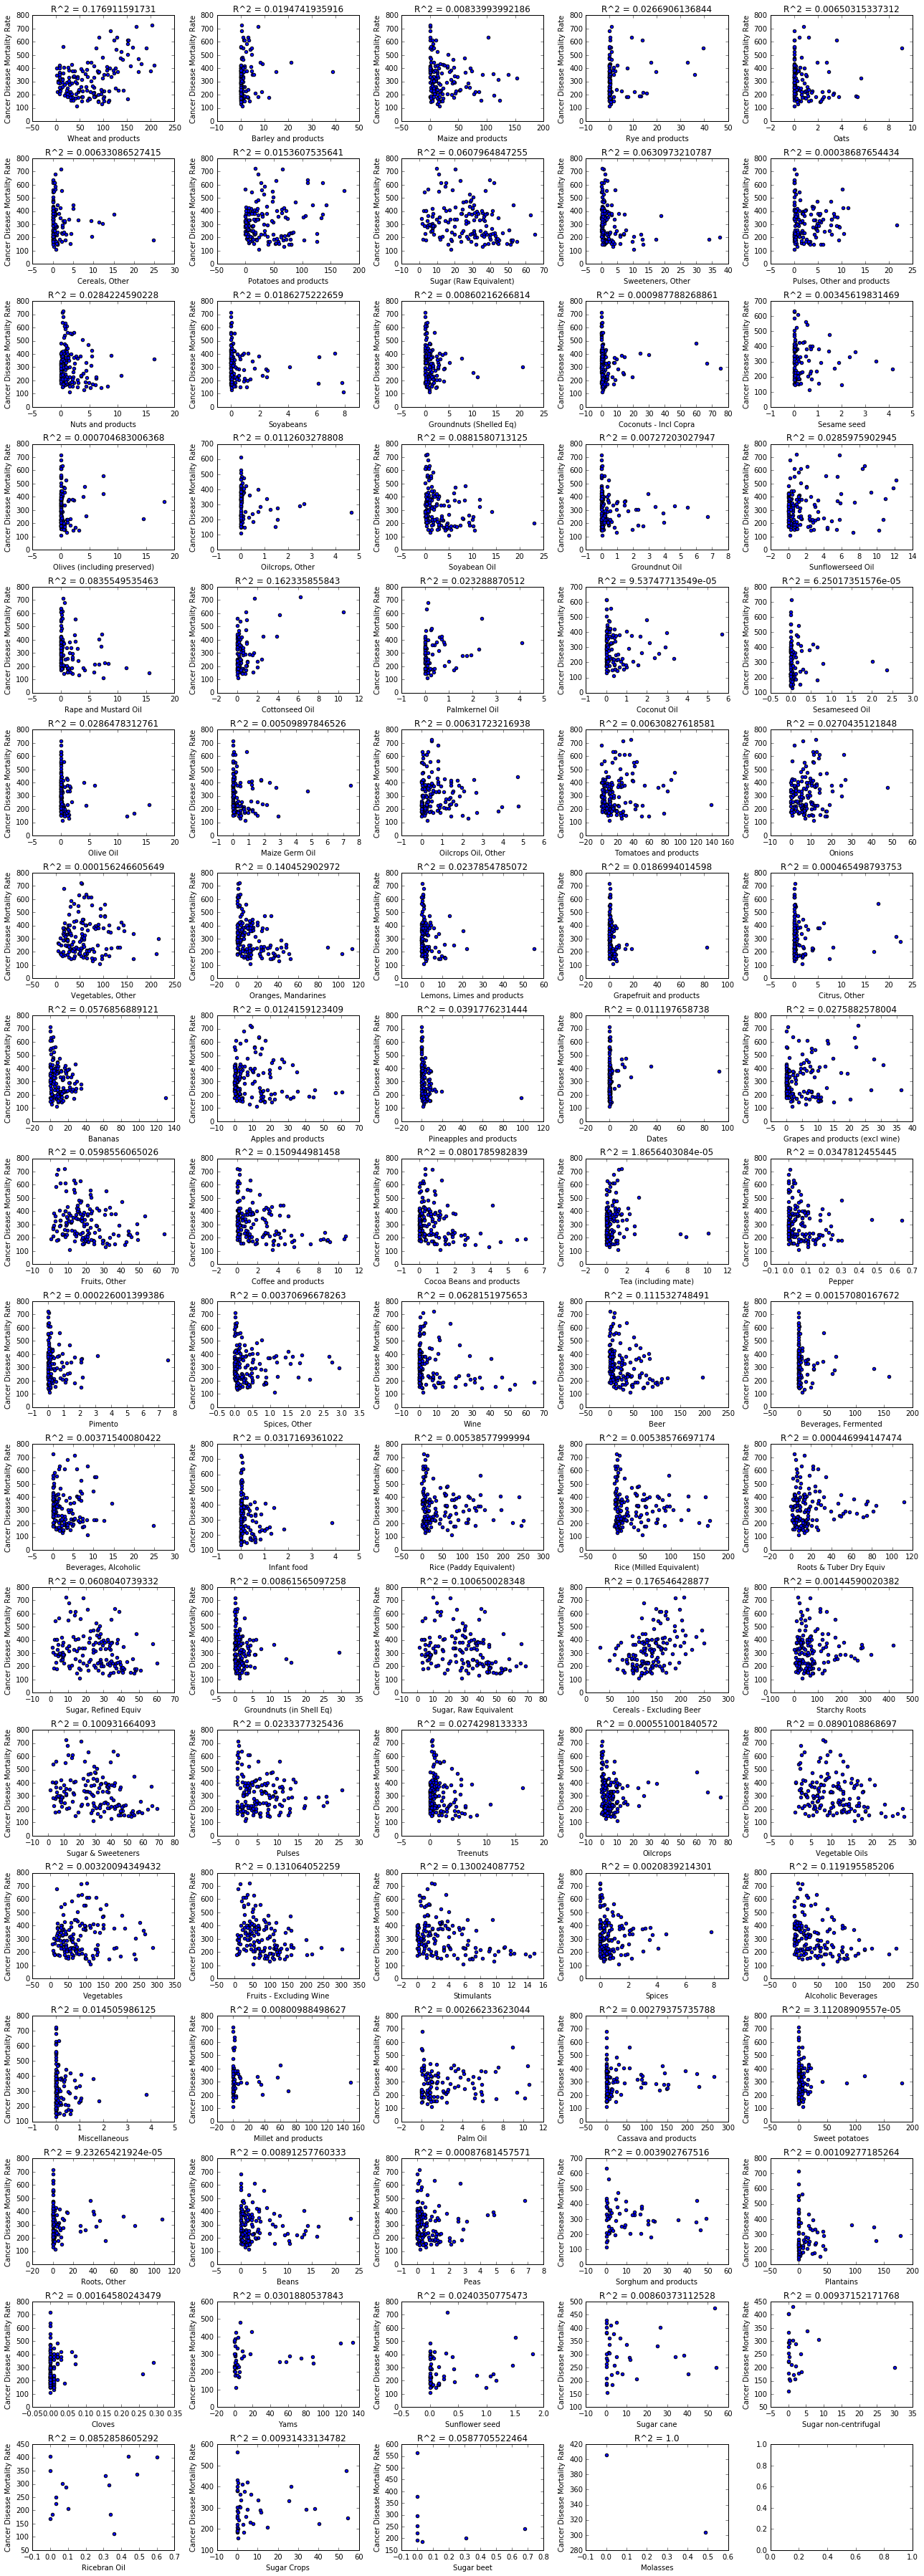

In [39]:
fig, ax = plt.subplots(18, 5, figsize=(18, 50))

#flatten list of axes
axes = [e for l in ax for e in l]

# store r2s
cardio_crop_r2 = {}

# go through and plot each one
for df, ax in zip(all_crop_dfs, axes):
    ax, r2 = food_cardio_plot(df, cardio, ax)
    crop_name = df['ItemName'].values[0]
    cardio_crop_r2[crop_name] = r2

plt.tight_layout()
plt.show()

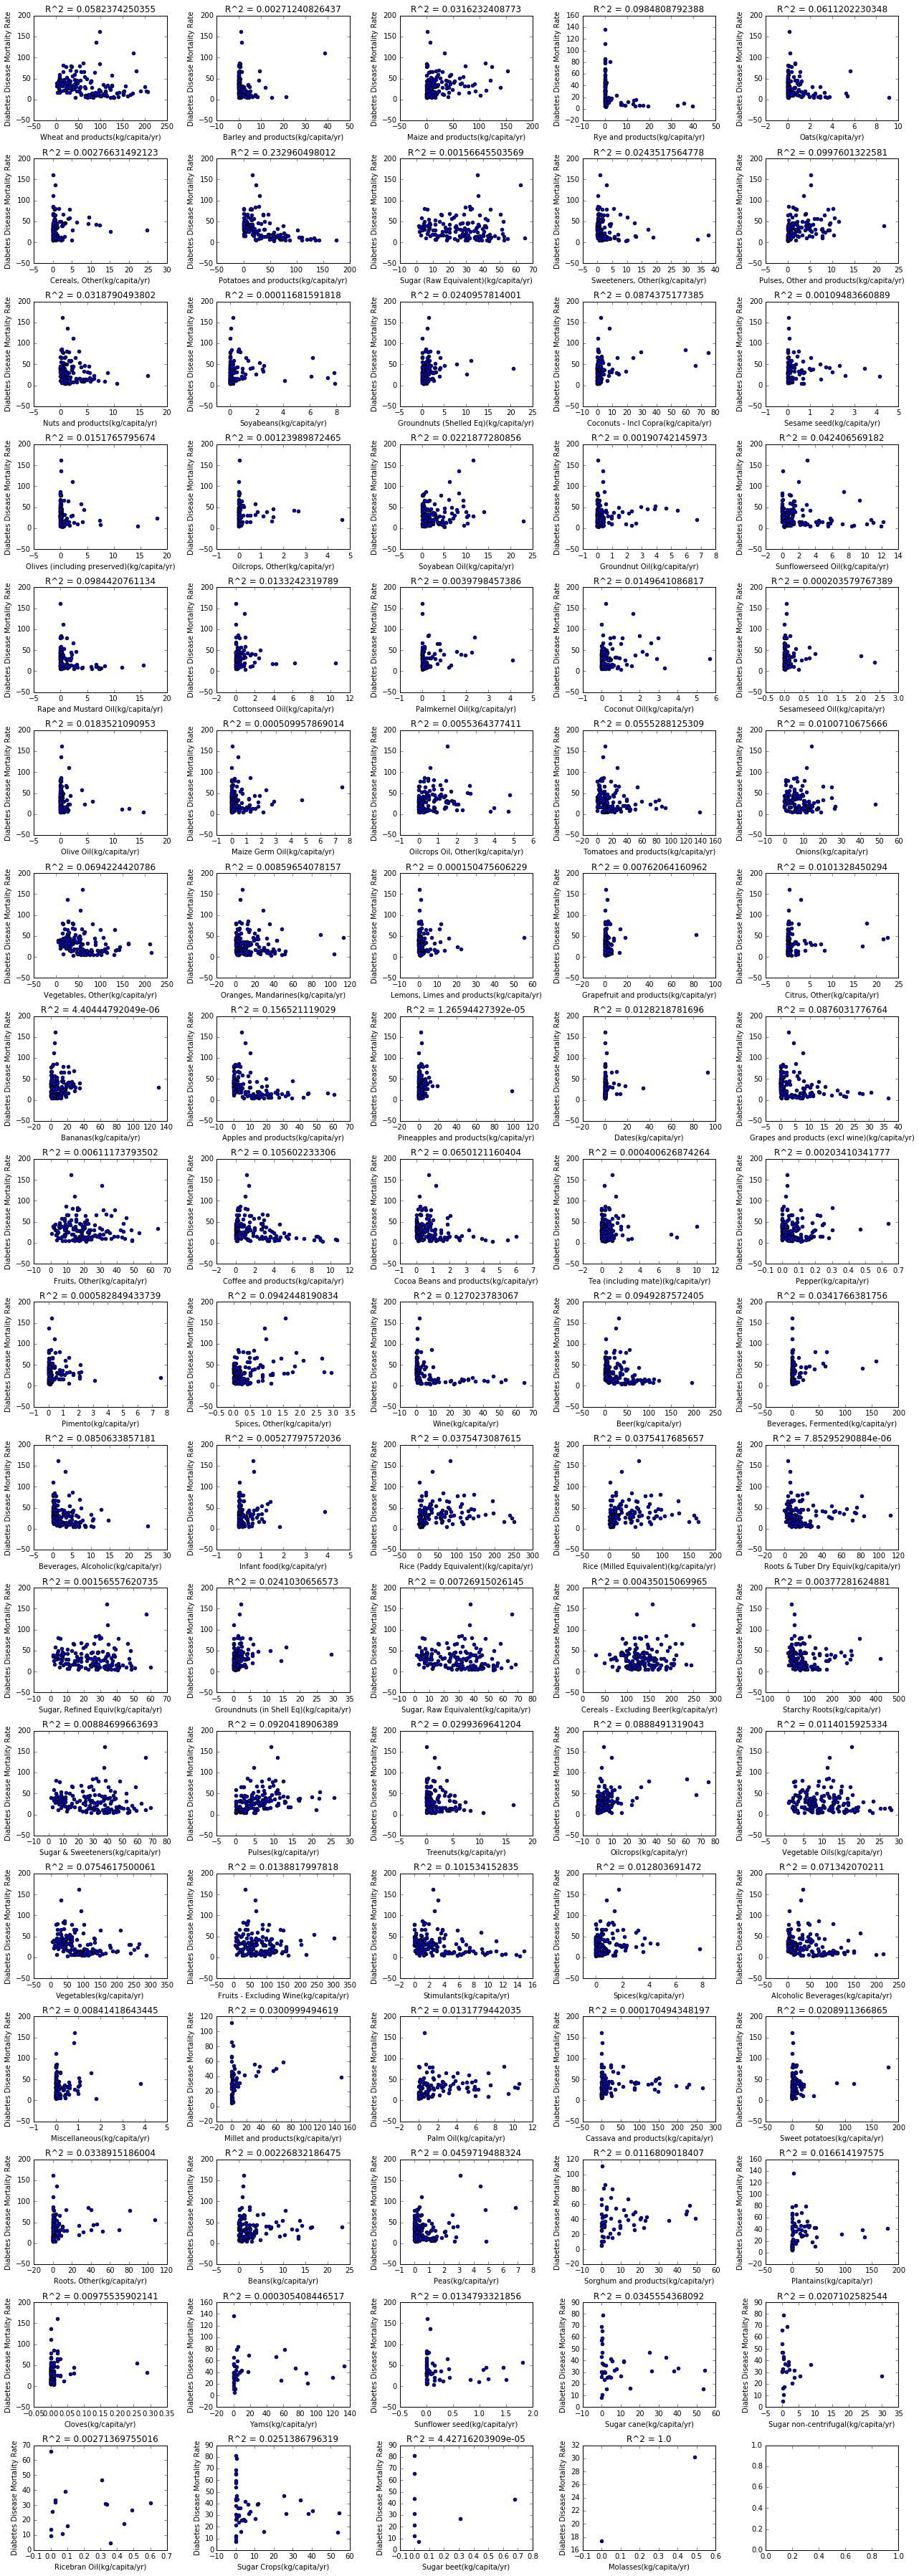

In [40]:
fig, ax = plt.subplots(18, 5, figsize=(18, 50))

# flatten list of axes
axes = [e for l in ax for e in l]

# store r2s
diabetes_crop_r2 = {}
    
# iterate through
for df, ax in zip(all_crop_dfs, axes):
    ax, r2 = food_diabetes_plot(df, diabetes, ax)
    crop_name = df['ItemName'].values[0]
    diabetes_crop_r2[crop_name] = r2


plt.tight_layout()
plt.show()

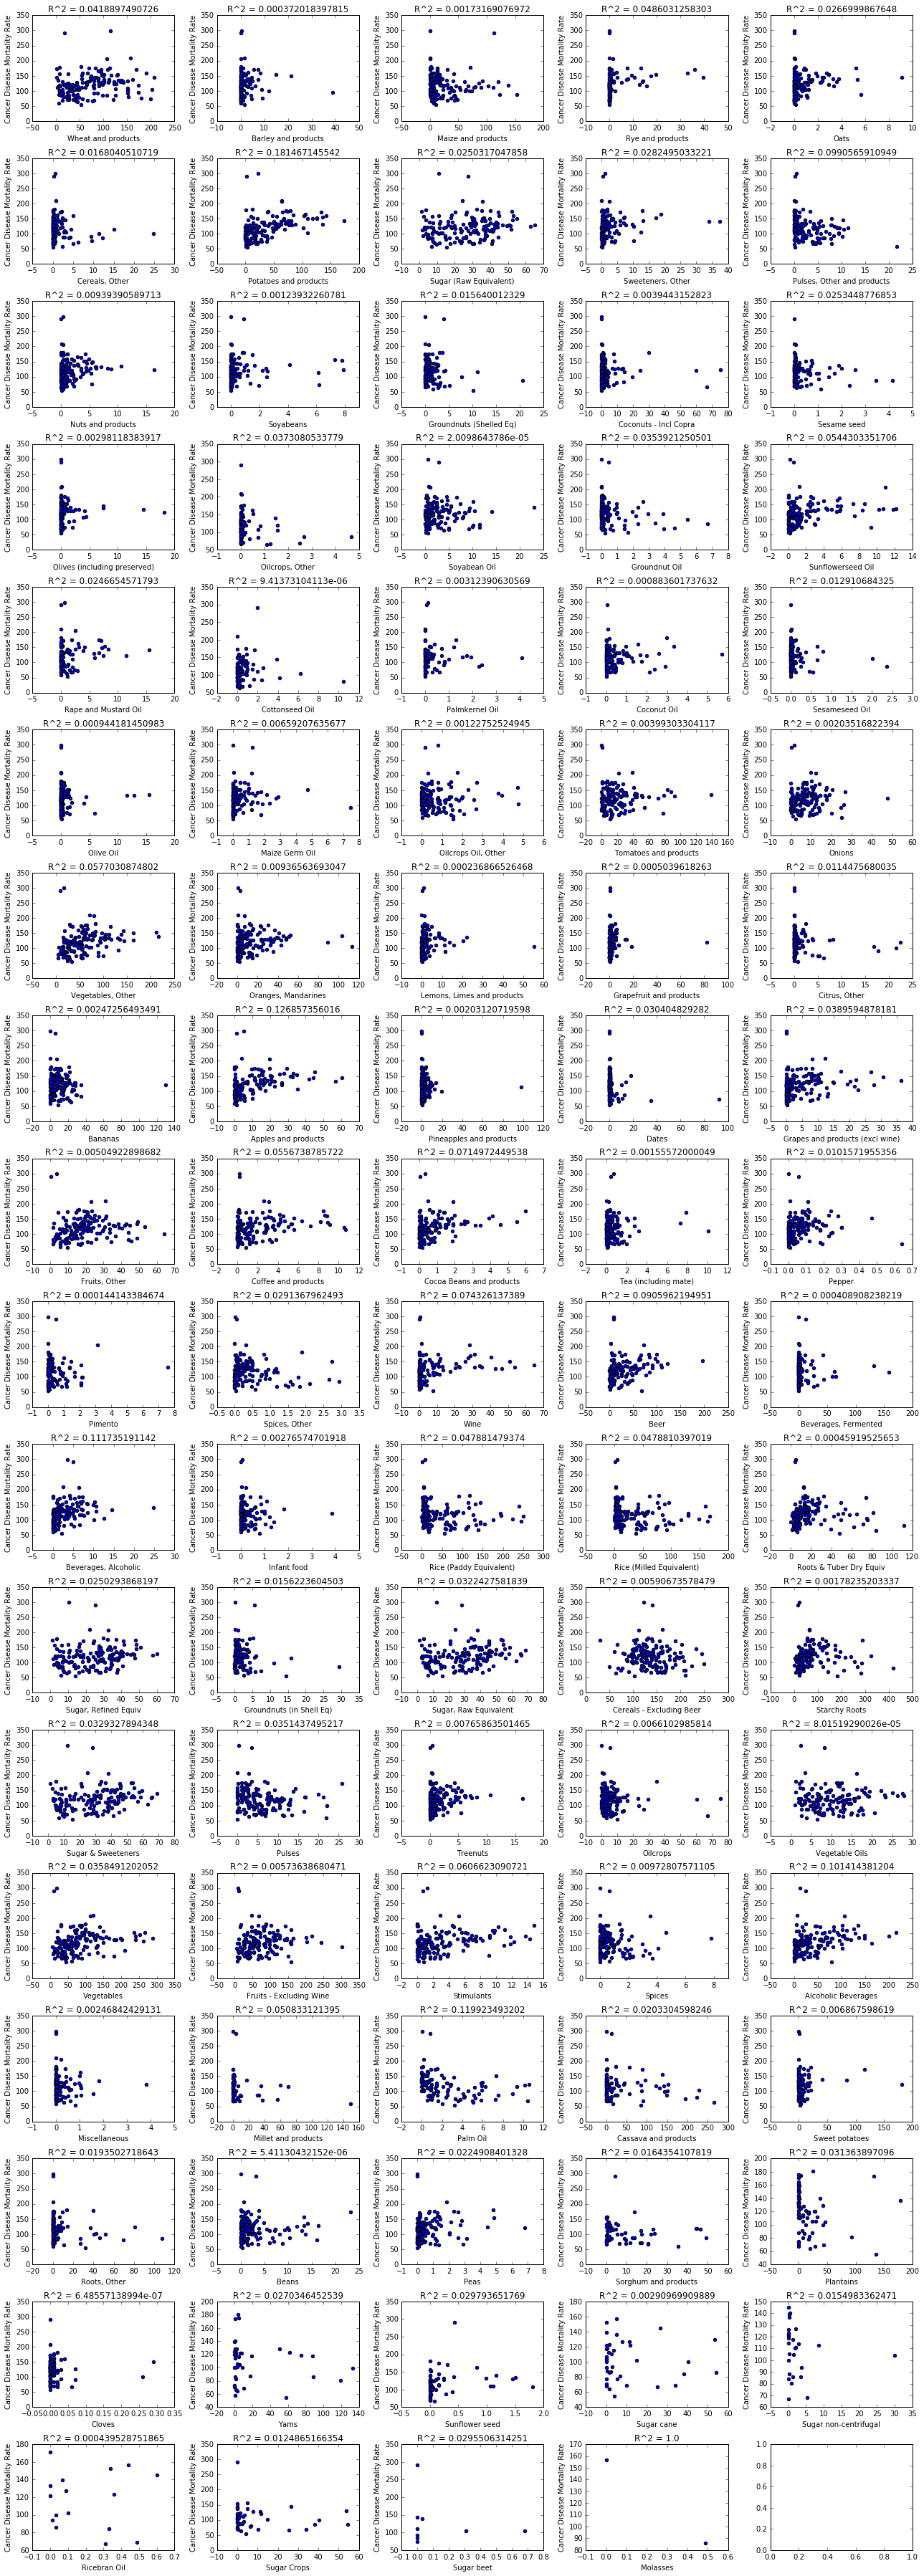

In [41]:
fig, ax = plt.subplots(18, 5, figsize=(18, 50))

# flatten list of axes
axes = [e for l in ax for e in l]

# store r2s
cancer_crop_r2 = {}

# go through
for df, ax in zip(all_crop_dfs, axes):
    ax, r2 =food_cancer_plot(df, cancer, ax)
    crop_name = df['ItemName'].values[0]
    cancer_crop_r2[crop_name] = r2

plt.tight_layout()
plt.show()

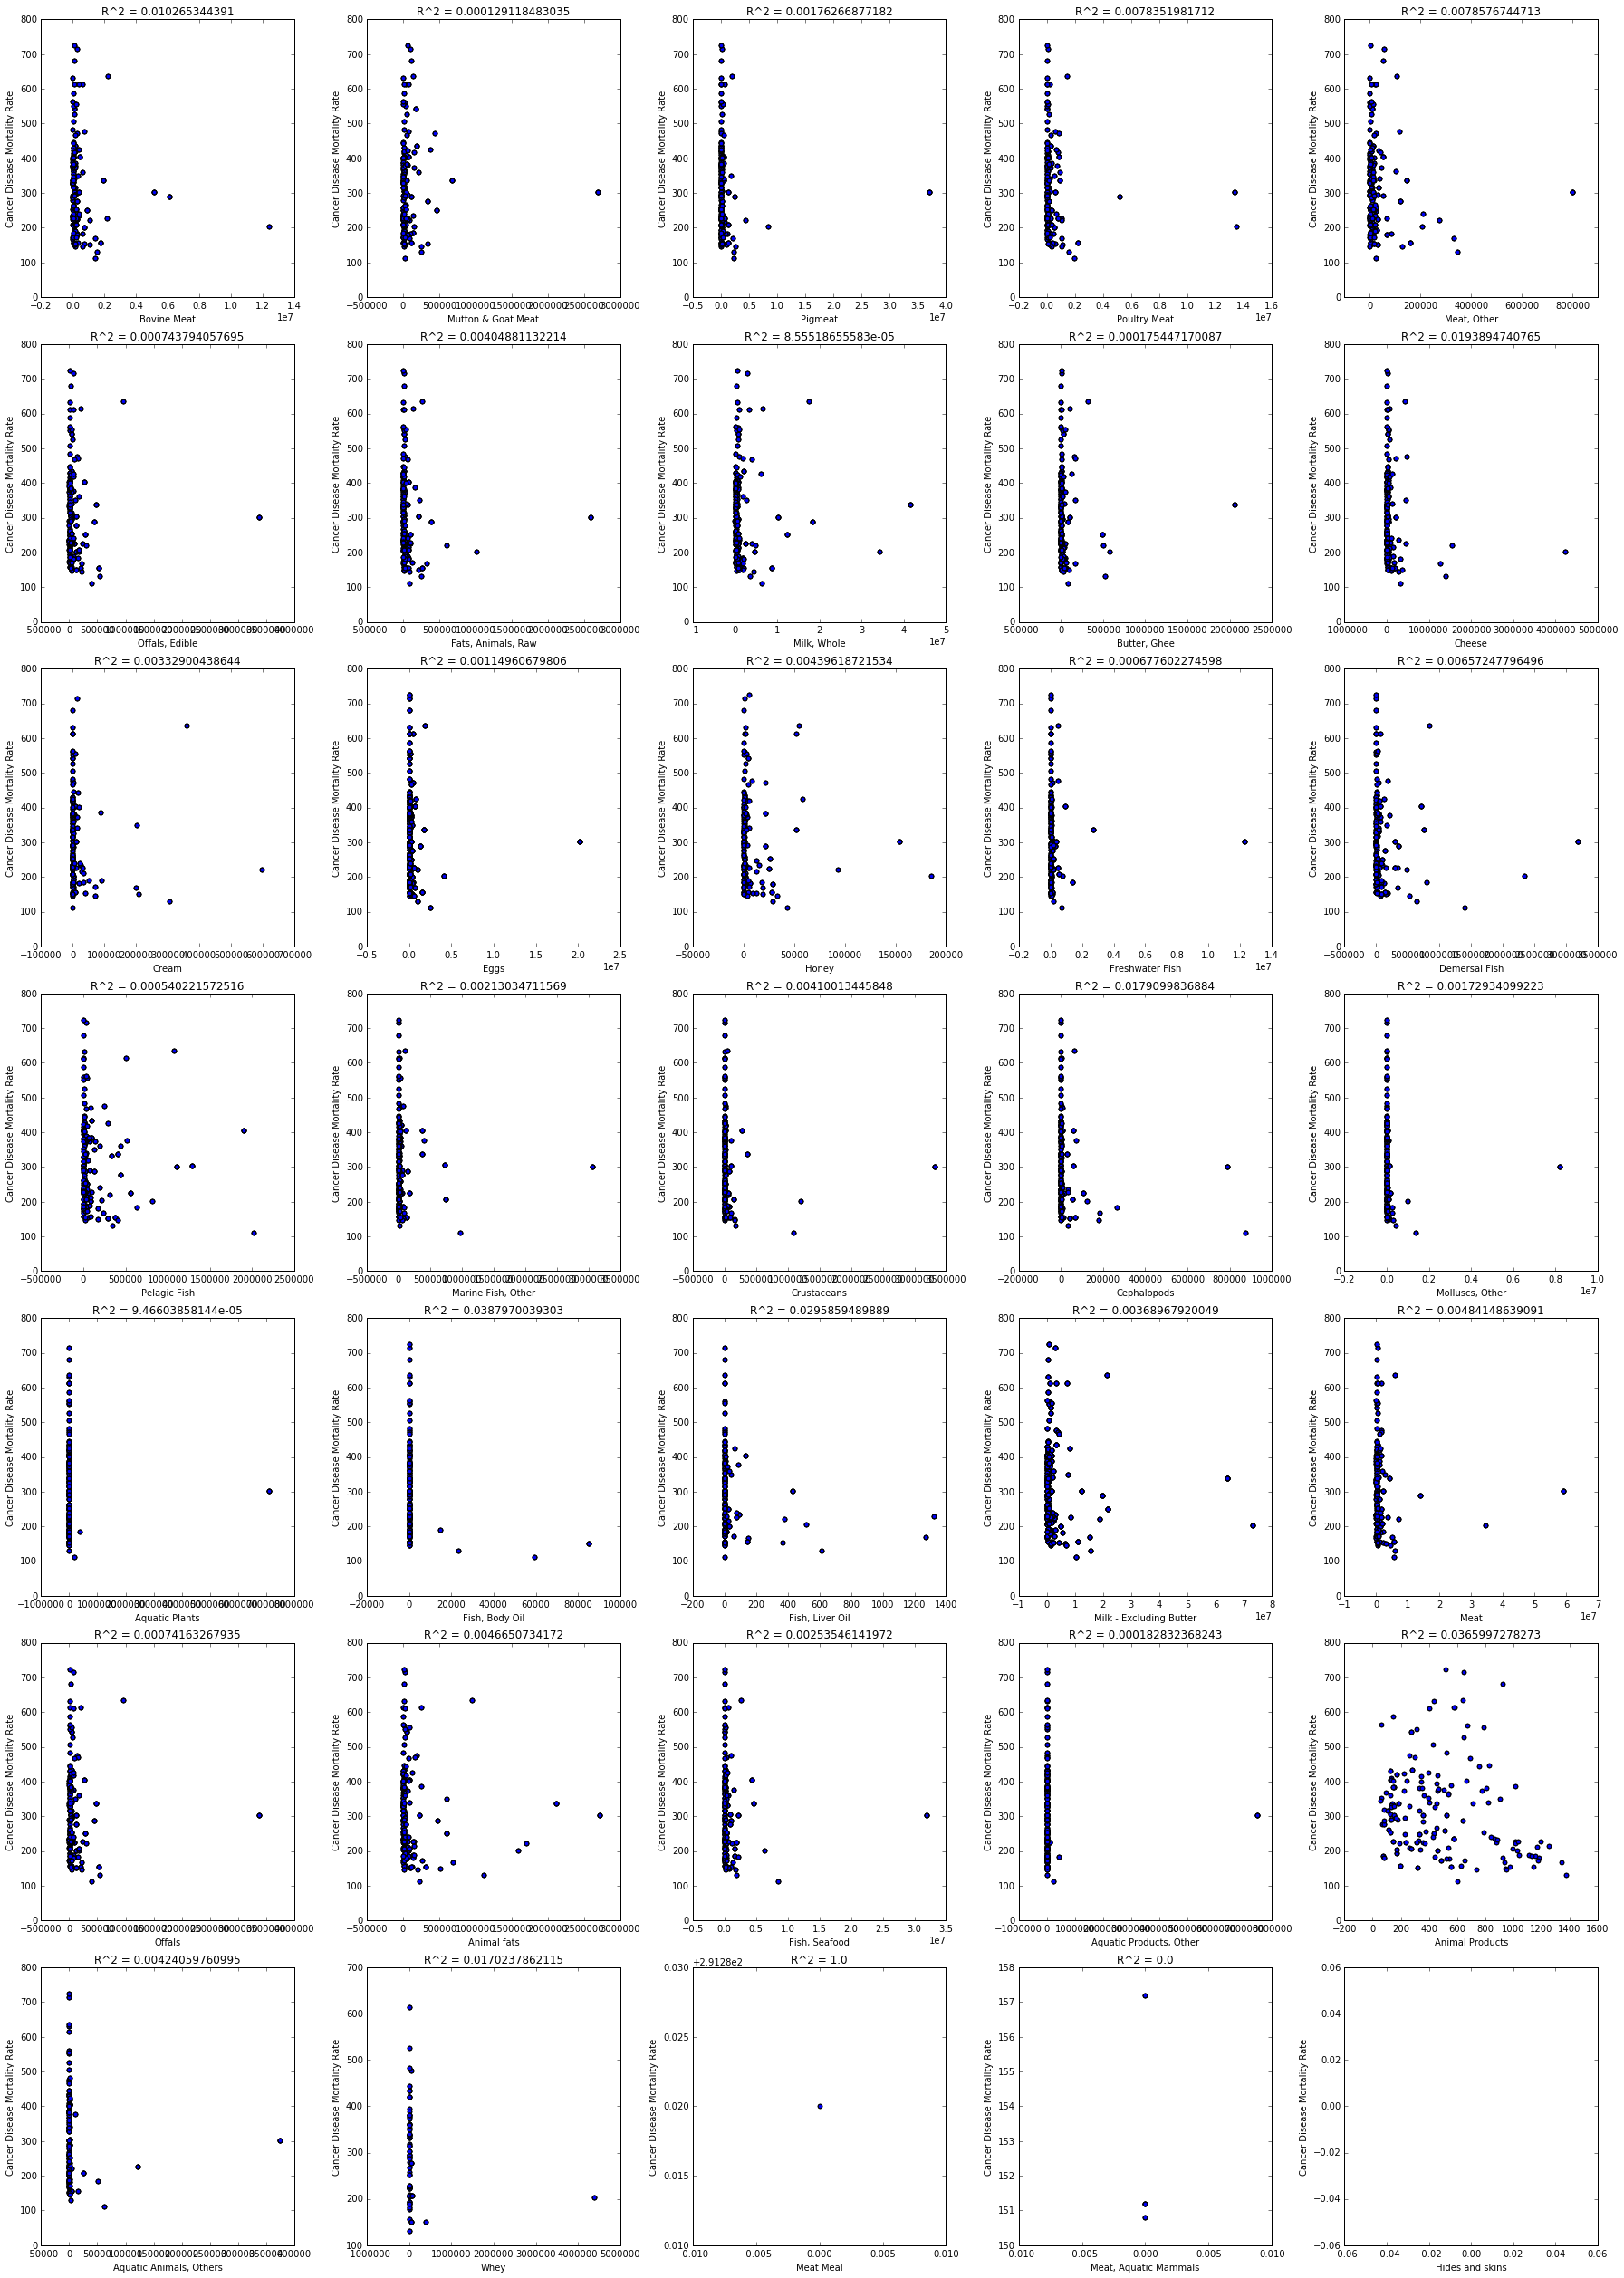

In [46]:
fig, ax = plt.subplots(7, 5, figsize=(25, 35))

axes = [e for l in ax for e in l]

cardio_livestock_r2 = {}

for df, ax in zip(livestock_dfs, axes):
    ax, r2 =food_cardio_plot(df, cardio, ax)
    livestock_name = df['ItemName'].values[0]
    cardio_livestock_r2[livestock_name] = r2

plt.tight_layout()
plt.show()

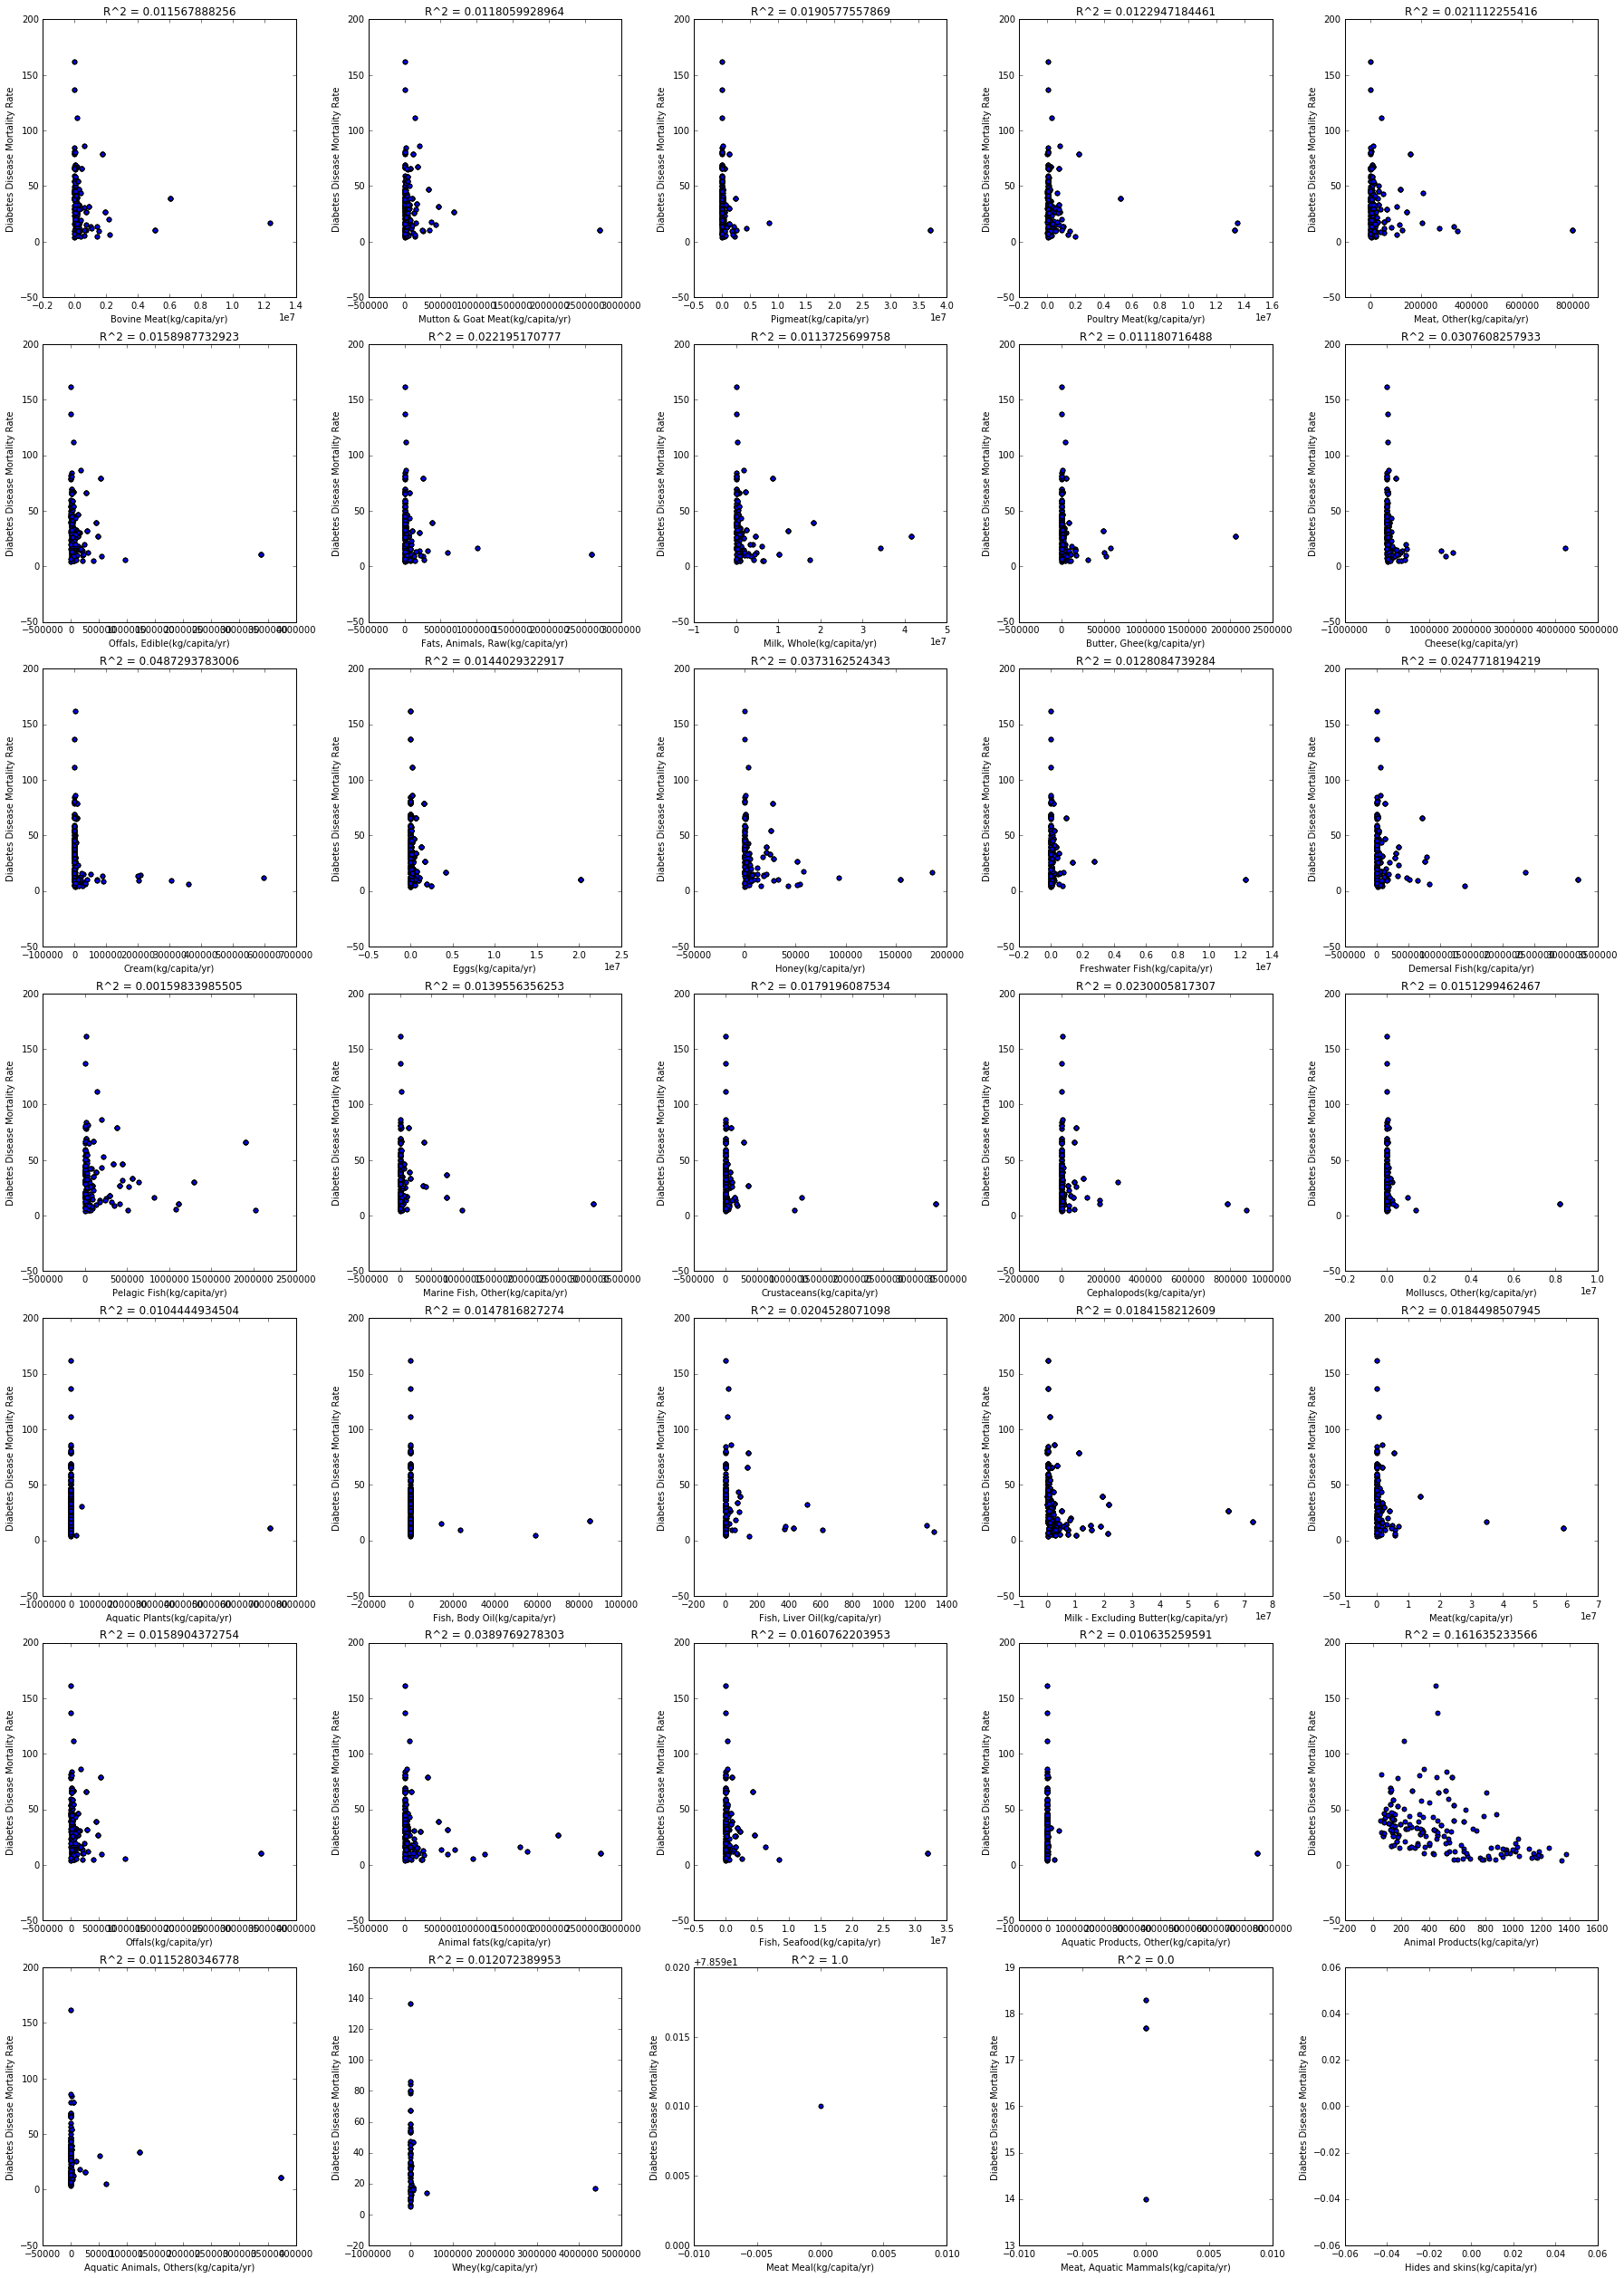

In [47]:
fig, ax = plt.subplots(7, 5, figsize=(25, 35))

axes = [e for l in ax for e in l]

diabetes_livestock_r2 = {}

for df, ax in zip(livestock_dfs, axes):
    ax, r2 =food_diabetes_plot(df, diabetes, ax)
    livestock_name = df['ItemName'].values[0]
    diabetes_livestock_r2[livestock_name] = r2

plt.tight_layout()
plt.show()

{'Animal Products': 0.13782440381828331, 'Meat, Aquatic Mammals': 0.0, 'Meat Meal': 1.0, 'Aquatic Products, Other': 0.00353222275657461, 'Honey': 0.0052637428739564784, 'Whey': 0.00417475995904526, 'Butter, Ghee': 0.0094586402207729181, 'Fats, Animals, Raw': 0.0086964785852524651, 'Crustaceans': 0.0026917672873718597, 'Eggs': 0.0032996051640215018, 'Milk, Whole': 0.0045470464573785785, 'Marine Fish, Other': 0.00051488869695659467, 'Demersal Fish': 0.0047298781135477475, 'Pigmeat': 0.0061053679627908206, 'Meat': 0.0056276749097191603, 'Freshwater Fish': 0.00022119829606881411, 'Milk - Excluding Butter': 0.0018935129822559293, 'Fish, Liver Oil': 0.0072314612337650566, 'Fish, Seafood': 0.0013677082943757135, 'Meat, Other': 0.0064762318220931148, 'Cephalopods': 0.0035978159036941237, 'Mutton & Goat Meat': 0.0001075483830690338, 'Cheese': 0.015827925923861508, 'Pelagic Fish': 0.0005990698417333018, 'Offals': 0.002565371099821578, 'Bovine Meat': 0.0030885740151288528, 'Molluscs, Other': 0.00

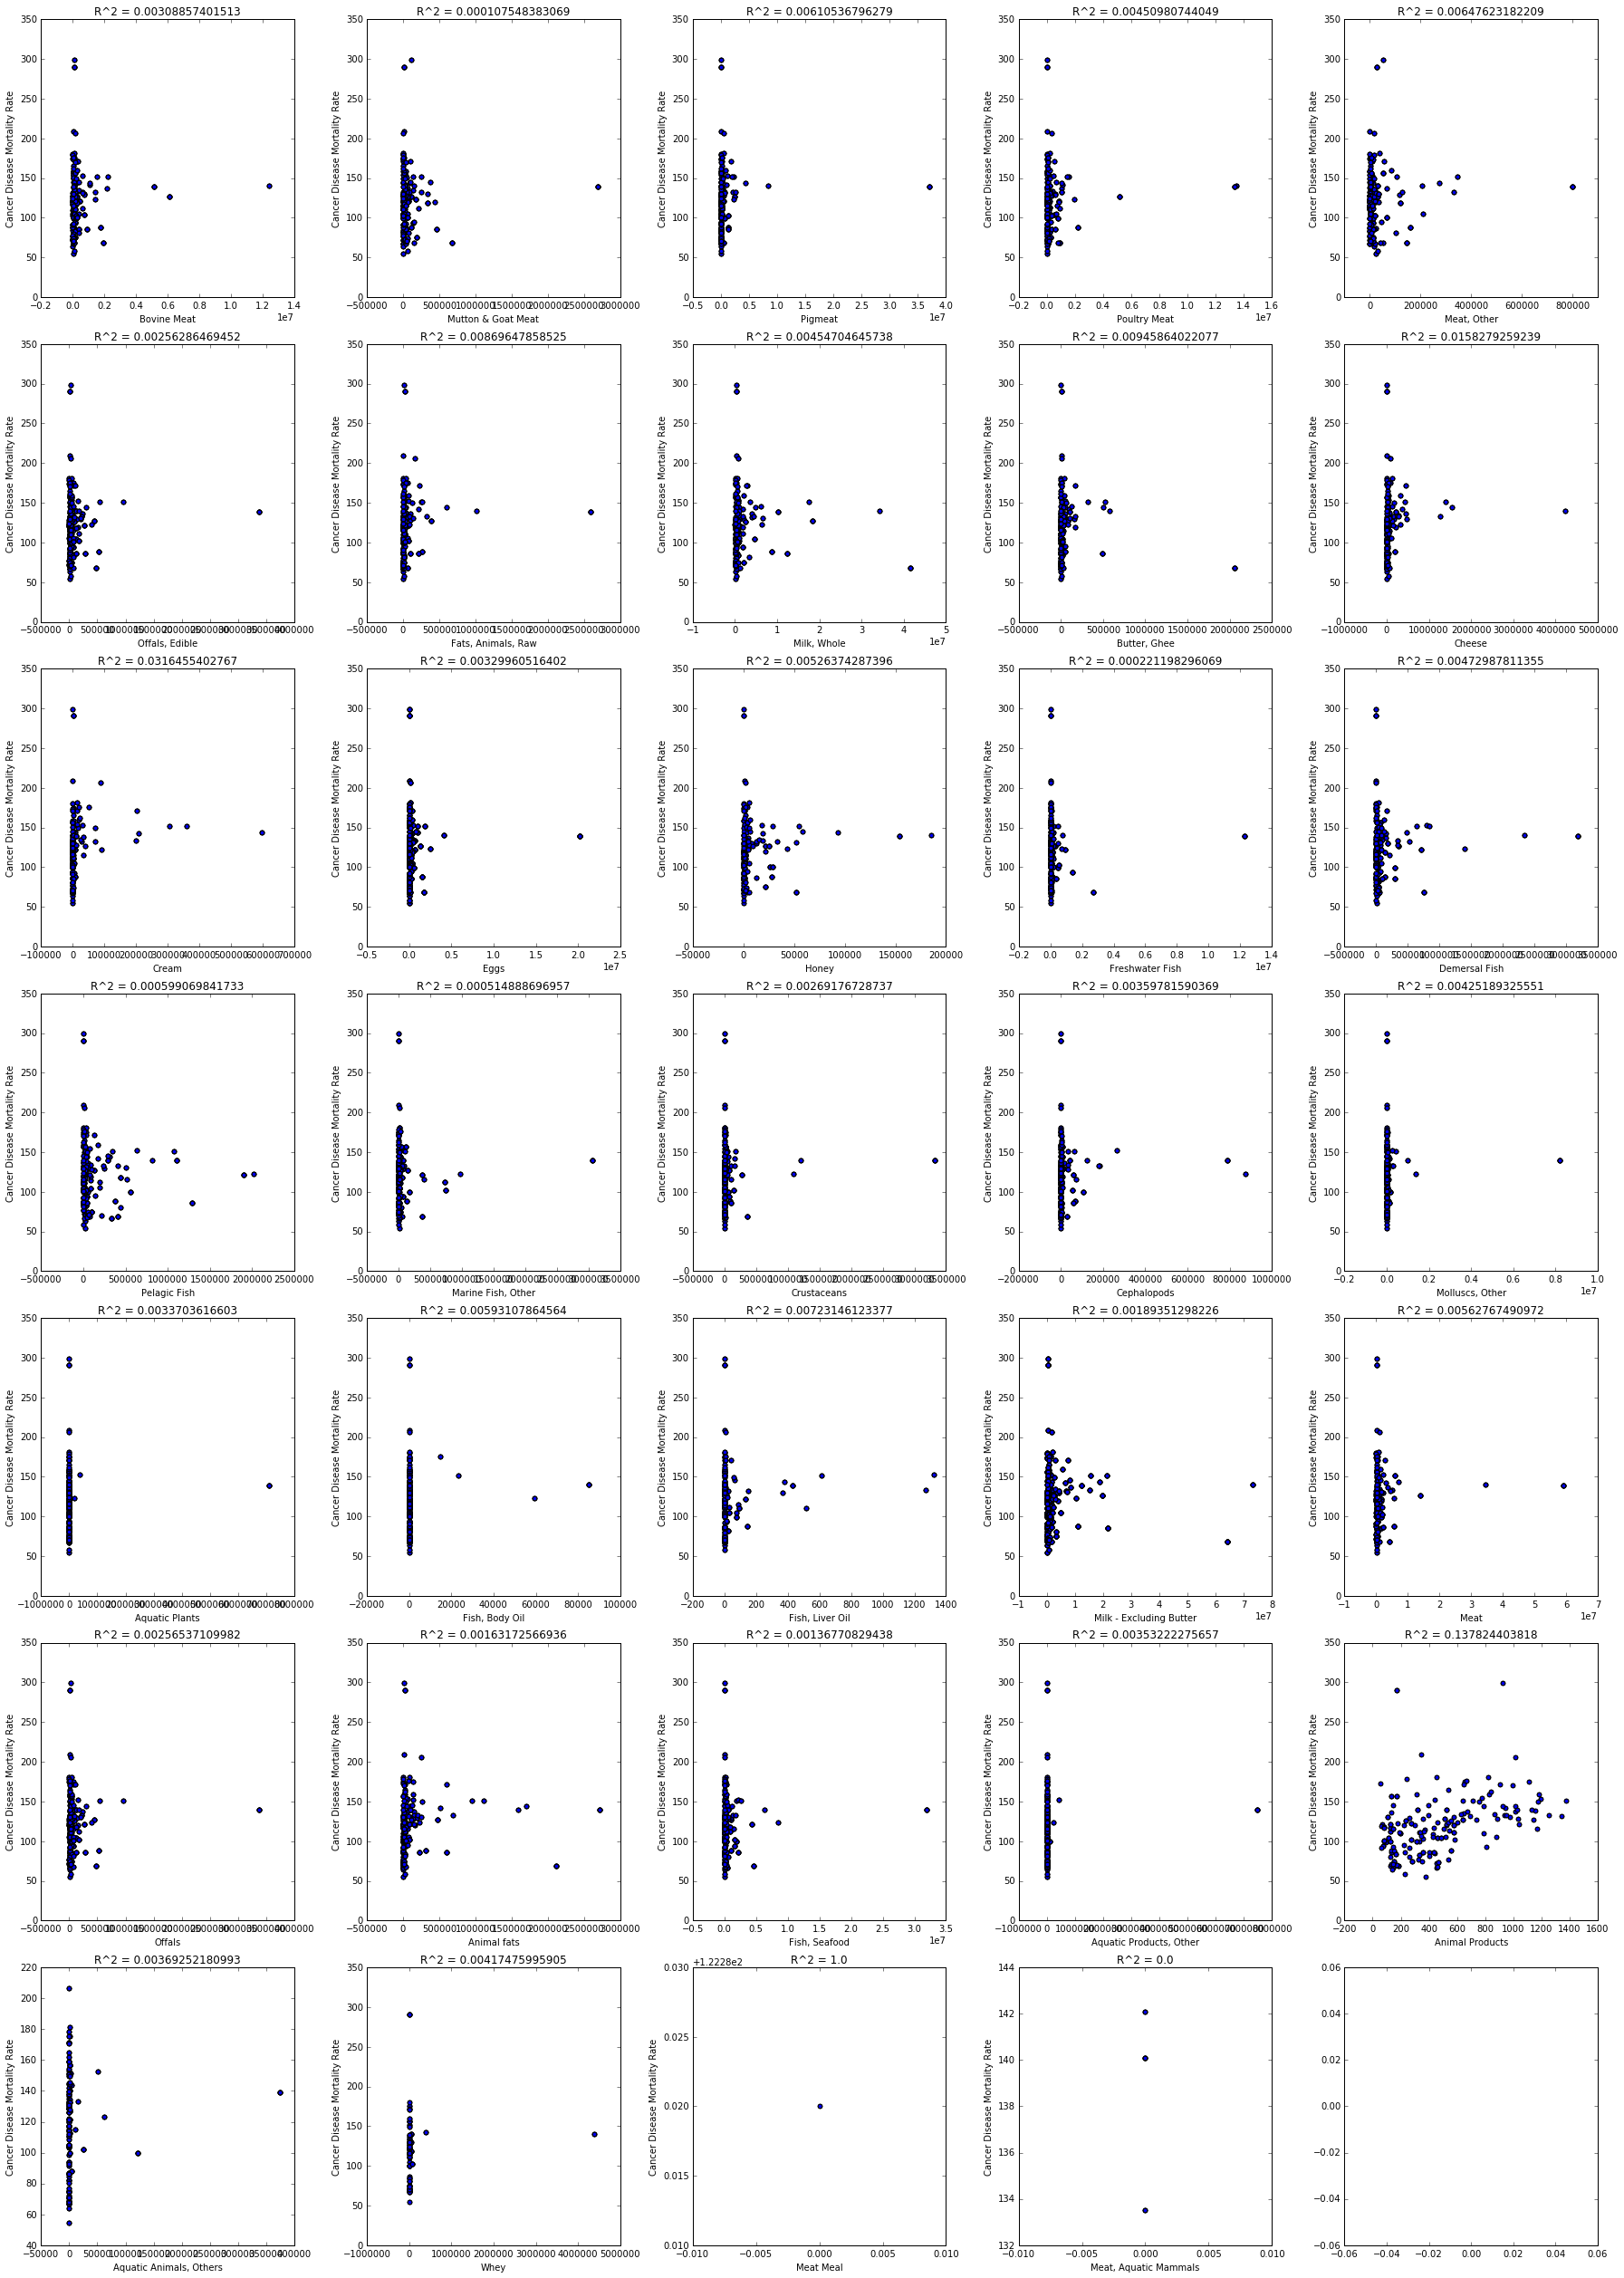

In [48]:
fig, ax = plt.subplots(7, 5, figsize=(25, 35))

axes = [e for l in ax for e in l]

cancer_livestock_r2 = {}

for df, ax in zip(livestock_dfs, axes):
    ax, r2 =food_cancer_plot(df, cancer, ax)
    livestock_name = df['ItemName'].values[0]
    cancer_livestock_r2[livestock_name] = r2

print cancer_livestock_r2
plt.tight_layout()
plt.show()

In [49]:
all_crop_dfs[0].head(n=5)

,﻿Domain Code,Domain,AreaCode,AreaName,ElementCode,ElementName,ItemCode,ItemName,Year,Value,Flag,FlagD
0,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,645.0,Food supply quantity (kg/capita/yr),2511.0,Wheat and products,2000.0,156.48,Fc,Calculated data
71,CC,Food Supply - Crops Primary Equivalent,2.0,Afghanistan,645.0,Food supply quantity (kg/capita/yr),2511.0,Wheat and products,2000.0,126.26,Fc,Calculated data
130,CC,Food Supply - Crops Primary Equivalent,3.0,Albania,645.0,Food supply quantity (kg/capita/yr),2511.0,Wheat and products,2000.0,161.61,Fc,Calculated data
200,CC,Food Supply - Crops Primary Equivalent,4.0,Algeria,645.0,Food supply quantity (kg/capita/yr),2511.0,Wheat and products,2000.0,180.20,Fc,Calculated data
276,CC,Food Supply - Crops Primary Equivalent,7.0,Angola,645.0,Food supply quantity (kg/capita/yr),2511.0,Wheat and products,2000.0,26.04,Fc,Calculated data


In [50]:
# dictionary of all dataframes, crop and livestock
all_dfs = {}
for df in all_crop_dfs:
    crop_name = df['ItemName'].values[0]
    all_dfs[crop_name] = df

for df in livestock_dfs:
    crop_name = df['ItemName'].values[0]
    all_dfs[crop_name] = df

In [51]:
print len(cancer_crop_r2)
print len(cancer_livestock_r2)
for k, v in cancer_livestock_r2.items():
    cancer_crop_r2[k] = v
print len(cancer_crop_r2)

89
35
124


In [52]:

for k, v in diabetes_livestock_r2.items():
    diabetes_crop_r2[k] = v

In [53]:
print len(cardio_crop_r2)
print len(cardio_livestock_r2)
for k, v in cardio_livestock_r2.items():
    cardio_crop_r2[k] = v
print len(cardio_crop_r2)

89
35
124


In [54]:
cancer_r2_sort = sorted(cancer_crop_r2.items(), key= lambda x: -x[1])
diabetes_r2_sort = sorted(diabetes_crop_r2.items(), key= lambda x: -x[1])
cardio_r2_sort = sorted(cardio_crop_r2.items(), key= lambda x: -x[1])

In [55]:
print cardio_r2_sort

[('Molasses', 1.0), ('Hides and skins', 1), ('Meat Meal', 1.0), ('Wheat and products', 0.17691159173120341), ('Cereals - Excluding Beer', 0.17654642887748373), ('Cottonseed Oil', 0.16233585584342747), ('Coffee and products', 0.15094498145821922), ('Oranges, Mandarines', 0.14045290297240975), ('Fruits - Excluding Wine', 0.13106405225895101), ('Stimulants', 0.13002408775163987), ('Alcoholic Beverages', 0.11919558520637275), ('Beer', 0.11153274849099726), ('Sugar & Sweeteners', 0.10093166409290155), ('Sugar, Raw Equivalent', 0.10065002834812142), ('Vegetable Oils', 0.089010886869657746), ('Soyabean Oil', 0.088158071312481212), ('Ricebran Oil', 0.085285860529225266), ('Rape and Mustard Oil', 0.083554953546264299), ('Cocoa Beans and products', 0.080178598283944802), ('Sweeteners, Other', 0.063097321078699475), ('Wine', 0.062815197565267322), ('Sugar, Refined Equiv', 0.060804073933226295), ('Sugar (Raw Equivalent)', 0.060796484725454063), ('Fruits, Other', 0.059855606502627667), ('Sugar beet

In [56]:
print cancer_2000.shape
cancer_2000.head(n=5)

(172, 5)


,Country,Year,Mortality,Mortality 2,Mortality 3
4,Afghanistan,2000,122.9,107.9,143.6
6,Albania,2000,137.7,109.0,169.4
8,Algeria,2000,75.1,77.8,72.6
10,Angola,2000,74.8,73.4,80.3
12,Argentina,2000,136.8,112.1,173.3


# Lin Reg for Cardio

In [57]:
N = 15
#x = pd.DataFrame({}) 

countries = list(cancer_2000['Country'].values)
cols = []
for name, r2 in cardio_r2_sort[:N]:
    if r2 != 1.0 and name != 'Cottonseed Oil':
        df = all_dfs[name]
        print df.shape
        cols.append(name)
        for country in countries:
            if country not in df['AreaName'].values:
                countries.remove(country)
print len(countries)

x = []
for country in countries:
    predictors = []
    for name, r2 in cardio_r2_sort[:N]:
        if r2 != 1.0 and name != 'Cottonseed Oil':
            df = all_dfs[name]
            for index, area in enumerate(df['AreaName'].values):
                if area == country and not math.isnan(df['Value'].values[index]):
                    predictors.append(df['Value'].values[index])
    x.append(predictors)

x_df = pd.DataFrame(x, columns = cols)
x_df.head(n=5)                 
    
        
    

(209, 12)
(209, 12)
(209, 12)
(208, 12)
(209, 12)
(209, 12)
(208, 12)
(208, 12)
(209, 12)
(209, 12)
(209, 12)
149


,Wheat and products,Cereals - Excluding Beer,Coffee and products,"Oranges, Mandarines",Fruits - Excluding Wine,Stimulants,Alcoholic Beverages,Beer,Sugar & Sweeteners,"Sugar, Raw Equivalent",Vegetable Oils
0,126.26,152.56,0.00,0.82,24.74,0.94,0.00,0.00,3.19,2.97,1.99
1,161.61,172.77,1.28,8.66,70.80,1.51,15.73,12.49,23.00,22.80,6.96
2,180.20,209.26,3.36,12.07,40.93,3.81,3.17,3.16,28.70,28.67,15.02
3,26.04,73.55,0.11,0.00,28.24,0.17,15.94,8.73,9.66,8.11,8.05
4,110.99,129.01,1.02,39.04,109.50,9.13,68.69,33.04,47.42,47.29,14.28


In [58]:
y = []
for country in countries:
    for index, area in enumerate(cancer_2000['Country'].values):
        if area == country:
            y.append(cancer_2000['Mortality'].values[index])
            
y_df = pd.DataFrame(y, columns = ['Cancer Mortality Rate'])
y_df.head(n=5)

,Cancer Mortality Rate
0,122.9
1,137.7
2,75.1
3,74.8
4,136.8


In [59]:
x_df.head(n=30)

,Wheat and products,Cereals - Excluding Beer,Coffee and products,"Oranges, Mandarines",Fruits - Excluding Wine,Stimulants,Alcoholic Beverages,Beer,Sugar & Sweeteners,"Sugar, Raw Equivalent",Vegetable Oils
0,126.26,152.56,0.00,0.82,24.74,0.94,0.00,0.00,3.19,2.97,1.99
1,161.61,172.77,1.28,8.66,70.80,1.51,15.73,12.49,23.00,22.80,6.96
2,180.20,209.26,3.36,12.07,40.93,3.81,3.17,3.16,28.70,28.67,15.02
3,26.04,73.55,0.11,0.00,28.24,0.17,15.94,8.73,9.66,8.11,8.05
4,110.99,129.01,1.02,39.04,109.50,9.13,68.69,33.04,47.42,47.29,14.28
5,156.48,161.90,2.62,0.41,48.11,2.93,6.18,2.31,24.71,24.26,3.58
6,66.25,81.42,2.82,23.74,90.92,5.04,112.47,89.90,44.97,44.38,19.16
7,80.13,117.33,5.31,9.13,127.06,7.98,148.63,109.90,46.51,44.91,18.83
8,190.92,201.90,0.01,1.93,58.14,0.49,19.83,8.86,10.96,10.85,2.22
9,46.93,87.25,2.64,112.93,302.01,3.36,30.20,10.07,43.62,43.78,3.36


In [60]:
last = -1
linreg = LinReg()
#linreg.fit(x_df.iloc[:, :last], y_df)
#linreg.score(x_df.iloc[:, :last], y_df)
linreg.fit(x_df, y_df)
linreg.score(x_df, y_df)

0.20538255210022283

# Lin Reg for Diabetes

In [61]:
N = 22
#x = pd.DataFrame({}) 

countries = list(diabetes_2000['Country'].values)
cols = []
for name, r2 in diabetes_r2_sort[:N]:
    if r2 != 1.0 and name != 'Rye and products' and name != 'Rape and Mustard Oil':
        df = all_dfs[name]
        print df.shape
        cols.append(name)
        for country in countries:
            if country not in df['AreaName'].values:
                countries.remove(country)
print len(countries)
print cols
print len(cols)

x = []
for country in countries:
    predictors = []
    for name, r2 in diabetes_r2_sort[:N]:
        if r2 != 1.0 and name != 'Rye and products' and name != 'Rape and Mustard Oil':
            df = all_dfs[name]
            for index, area in enumerate(df['AreaName'].values):
                #if area == country and not math.isnan(df['Value'].values[index]):
                if area == country:
                    predictors.append(df['Value'].values[index])
                    #print name
                    break
    x.append(predictors)
    #print 'end'

x_df = pd.DataFrame(x, columns = cols)
x_df.head(n=5)                 
    
        

(209, 12)
(759, 12)
(209, 12)
(205, 12)
(209, 12)
(209, 12)
(205, 12)
(208, 12)
(207, 12)
(208, 12)
(207, 12)
(206, 12)
(202, 12)
(206, 12)
(209, 12)
(208, 12)
(209, 12)
139
['Potatoes and products', 'Animal Products', 'Apples and products', 'Wine', 'Coffee and products', 'Stimulants', 'Pulses, Other and products', 'Beer', 'Spices, Other', 'Pulses', 'Oilcrops', 'Grapes and products (excl wine)', 'Coconuts - Incl Copra', 'Beverages, Alcoholic', 'Vegetables', 'Alcoholic Beverages', 'Vegetables, Other']
17


,Potatoes and products,Animal Products,Apples and products,Wine,Coffee and products,Stimulants,"Pulses, Other and products",Beer,"Spices, Other",Pulses,Oilcrops,Grapes and products (excl wine),Coconuts - Incl Copra,"Beverages, Alcoholic",Vegetables,Alcoholic Beverages,"Vegetables, Other"
0,10.63,275.0,0.40,0.00,0.00,0.94,1.05,0.00,0.00,1.05,0.58,9.13,0.00,0.00,29.34,0.00,29.34
1,29.18,674.0,10.94,2.37,1.28,1.51,0.17,12.49,0.01,5.14,7.87,22.15,0.00,0.93,156.73,15.73,102.24
2,37.07,277.0,2.89,0.01,3.36,3.81,3.87,3.16,0.10,5.45,0.73,4.59,0.00,0.00,75.82,3.17,42.43
3,48.21,1014.0,14.21,33.90,1.02,9.13,0.68,33.04,0.13,1.03,1.44,1.05,0.31,1.77,71.81,68.69,39.70
4,63.78,347.0,3.97,1.29,2.62,2.93,0.00,2.31,0.00,0.00,0.33,12.39,0.00,2.62,120.61,6.18,71.41


In [62]:
y = []
for country in countries:
    for index, area in enumerate(diabetes_2000['Country'].values):
        if area == country:
            y.append(diabetes_2000['Mortality'].values[index])
            
y_df = pd.DataFrame(y, columns = ['Diabetes Mortality Rate'])
y_df.head(n=5)

,Diabetes Mortality Rate
0,34.0
1,8.3
2,67.2
3,19.9
4,32.2


In [63]:
x_df.head(n=20)

,Potatoes and products,Animal Products,Apples and products,Wine,Coffee and products,Stimulants,"Pulses, Other and products",Beer,"Spices, Other",Pulses,Oilcrops,Grapes and products (excl wine),Coconuts - Incl Copra,"Beverages, Alcoholic",Vegetables,Alcoholic Beverages,"Vegetables, Other"
0,10.63,275.0,0.40,0.00,0.00,0.94,1.05,0.00,0.00,1.05,0.58,9.13,0.00,0.00,29.34,0.00,29.34
1,29.18,674.0,10.94,2.37,1.28,1.51,0.17,12.49,0.01,5.14,7.87,22.15,0.00,0.93,156.73,15.73,102.24
2,37.07,277.0,2.89,0.01,3.36,3.81,3.87,3.16,0.10,5.45,0.73,4.59,0.00,0.00,75.82,3.17,42.43
3,48.21,1014.0,14.21,33.90,1.02,9.13,0.68,33.04,0.13,1.03,1.44,1.05,0.31,1.77,71.81,68.69,39.70
4,63.78,347.0,3.97,1.29,2.62,2.93,0.00,2.31,0.00,0.00,0.33,12.39,0.00,2.62,120.61,6.18,71.41
5,52.54,977.0,14.71,20.26,2.82,5.04,0.55,89.90,0.06,1.19,4.36,11.01,2.27,2.05,97.93,112.47,64.03
6,62.13,1251.0,56.83,31.17,5.31,7.98,0.12,109.90,0.29,0.87,3.62,6.63,0.73,7.25,81.92,148.63,63.96
7,46.99,314.0,15.35,0.57,0.01,0.49,0.00,8.86,0.03,0.00,0.00,7.89,0.00,10.38,99.41,19.83,47.05
8,27.83,881.0,35.47,5.66,2.64,3.36,0.96,10.07,0.88,0.00,0.00,7.96,1.34,12.67,130.87,30.20,106.12
9,18.08,74.0,0.04,0.00,0.00,0.26,2.67,0.02,0.86,4.00,0.49,0.09,0.03,0.01,12.55,0.02,10.69


In [64]:
last = -1
linreg = LinReg()
#linreg.fit(x_df.iloc[:, :last], y_df)
#linreg.score(x_df.iloc[:, :last], y_df)
linreg.fit(x_df, y_df)
linreg.score(x_df, y_df)

0.40876401184532102

# Lin Reg for Cancer

In [65]:
N = 20
#x = pd.DataFrame({}) 

countries = list(cancer_2000['Country'].values)
#print countries
#print cancer_r2_sort[:20]
cols = []
for name, r2 in cancer_r2_sort[:N]:
    if r2 != 1.0 and name != 'Palm Oil' and name != 'Millet and products' and name != 'Rye and products':
        df = all_dfs[name]
        print df.shape
        cols.append(name)
        for country in countries:
            if country not in df['AreaName'].values:
                countries.remove(country)
    else:
        print 'r^2 was 1'
print len(countries)
print cols
print len(cols)

x = []
for country in countries:
    predictors = []
    for name, r2 in cancer_r2_sort[:N]:
        if r2 != 1.0 and name != 'Palm Oil' and name != 'Millet and products' and name != 'Rye and products':
            df = all_dfs[name]
            for index, area in enumerate(df['AreaName'].values):
                #if area == country and not math.isnan(df['Value'].values[index]):
                if area == country:
                    predictors.append(df['Value'].values[index])
                    #print name
                    break
    x.append(predictors)
    #print 'end'

x_df = pd.DataFrame(x, columns = cols)
x_df.head(n=5)                 
    
        

r^2 was 1
r^2 was 1
r^2 was 1
(209, 12)
(759, 12)
(209, 12)
r^2 was 1
(206, 12)
(208, 12)
(205, 12)
(208, 12)
(205, 12)
(209, 12)
(209, 12)
(209, 12)
(209, 12)
(194, 12)
r^2 was 1
r^2 was 1
(209, 12)
135
['Potatoes and products', 'Animal Products', 'Apples and products', 'Beverages, Alcoholic', 'Alcoholic Beverages', 'Pulses, Other and products', 'Beer', 'Wine', 'Cocoa Beans and products', 'Stimulants', 'Vegetables, Other', 'Coffee and products', 'Sunflowerseed Oil', 'Rice (Paddy Equivalent)']
14


,Potatoes and products,Animal Products,Apples and products,"Beverages, Alcoholic",Alcoholic Beverages,"Pulses, Other and products",Beer,Wine,Cocoa Beans and products,Stimulants,"Vegetables, Other",Coffee and products,Sunflowerseed Oil,Rice (Paddy Equivalent)
0,10.63,275.0,0.40,0.00,0.00,1.05,0.00,0.00,0.00,0.94,29.34,0.00,0.23,27.07
1,29.18,674.0,10.94,0.93,15.73,0.17,12.49,2.37,0.42,1.51,102.24,1.28,4.25,8.19
2,37.07,277.0,2.89,0.00,3.17,3.87,3.16,0.01,0.26,3.81,42.43,3.36,9.30,2.55
3,48.21,1014.0,14.21,1.77,68.69,0.68,33.04,33.90,0.75,9.13,39.70,1.02,10.67,7.91
4,63.78,347.0,3.97,2.62,6.18,0.00,2.31,1.29,0.49,2.93,71.41,2.62,1.25,4.64


In [66]:
y = []
for country in countries:
    for index, area in enumerate(cancer_2000['Country'].values):
        if area == country:
            y.append(cancer_2000['Mortality'].values[index])
            
y_df = pd.DataFrame(y, columns = ['Cancer Mortality Rate'])
y_df.head(n=5)

,Cancer Mortality Rate
0,122.9
1,137.7
2,75.1
3,136.8
4,209.0


In [67]:
x_df.head(n=20)

,Potatoes and products,Animal Products,Apples and products,"Beverages, Alcoholic",Alcoholic Beverages,"Pulses, Other and products",Beer,Wine,Cocoa Beans and products,Stimulants,"Vegetables, Other",Coffee and products,Sunflowerseed Oil,Rice (Paddy Equivalent)
0,10.63,275.0,0.40,0.00,0.00,1.05,0.00,0.00,0.00,0.94,29.34,0.00,0.23,27.07
1,29.18,674.0,10.94,0.93,15.73,0.17,12.49,2.37,0.42,1.51,102.24,1.28,4.25,8.19
2,37.07,277.0,2.89,0.00,3.17,3.87,3.16,0.01,0.26,3.81,42.43,3.36,9.30,2.55
3,48.21,1014.0,14.21,1.77,68.69,0.68,33.04,33.90,0.75,9.13,39.70,1.02,10.67,7.91
4,63.78,347.0,3.97,2.62,6.18,0.00,2.31,1.29,0.49,2.93,71.41,2.62,1.25,4.64
5,52.54,977.0,14.71,2.05,112.47,0.55,89.90,20.26,1.45,5.04,64.03,2.82,2.85,13.13
6,62.13,1251.0,56.83,7.25,148.63,0.12,109.90,31.17,2.37,7.98,63.96,5.31,4.86,5.32
7,46.99,314.0,15.35,10.38,19.83,0.00,8.86,0.57,0.08,0.49,47.05,0.01,0.71,5.06
8,27.83,881.0,35.47,12.67,30.20,0.96,10.07,5.66,0.67,3.36,106.12,2.64,0.10,32.79
9,18.08,74.0,0.04,0.01,0.02,2.67,0.02,0.00,0.00,0.26,10.69,0.00,0.00,245.78


In [68]:
last = -1
linreg = LinReg()
#linreg.fit(x_df.iloc[:, :last], y_df)
#linreg.scoare(x_df.iloc[:, :last], y_df)
linreg.fit(x_df, y_df)
linreg.score(x_df, y_df)

0.31225202575257005